# NLP Project: IMDb Sentiment Analysis

## **Objective**
To build machine learning and deep learning model to classify IMDb movie reviews into positive or negative sentiments using various NLP techniques.

##  Installing and Importing library

In [96]:
# Data Handling
import pandas as pd
import numpy as np

# Text Preprocessing
import re
import string

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# ML + Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
from sklearn.preprocessing import LabelEncoder

In [97]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, GlobalMaxPool1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [98]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Data exploration and cleaning
- Exploring data
- cheking length of review column
- applying clean_text function which invole all cleaning step
- maintaining sequence and mapping positive: 1 and negative: 0 in sentiment column

In [99]:
df=pd.read_csv('imdb.csv')

In [100]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [102]:
df['sentiment'].value_counts()


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

<Axes: title={'center': 'Review Length Distribution'}, ylabel='Frequency'>

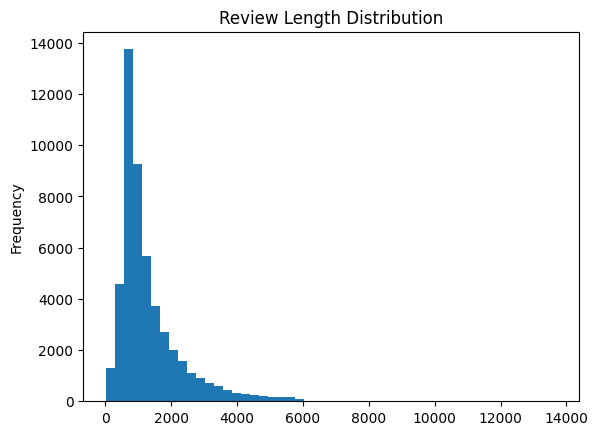

In [103]:
df['review_length'] = df['review'].apply(len)
df['review_length'].plot(kind='hist', bins=50, title='Review Length Distribution')

In [104]:
stop_words = set(stopwords.words('english'))
stemmer= PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [105]:
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)

    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in stop_words]

    # Apply stemming and lemmatization
    words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in words]

    return ' '.join(words)


In [106]:
df['clean_review'] = df['review'].apply(clean_text)


In [107]:
df.head(10)


,review,sentiment,review_length,clean_review
0,One of the other reviewers has mentioned that ...,positive,1761,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,positive,998,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,748,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei love time money visual stun film...
5,"Probably my all-time favorite movie, a story o...",positive,656,probabl time favorit movi stori selfless sacri...
6,I sure would like to see a resurrection of a u...,positive,726,sure would like see resurrect date seahunt ser...
7,"This show was an amazing, fresh & innovative i...",negative,934,show amaz fresh innov idea 70 first air first ...
8,Encouraged by the positive comments about this...,negative,681,encourag posit comment film look forward watch...
9,If you like original gut wrenching laughter yo...,positive,176,like origin gut wrench laughter like movi youn...


In [108]:

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_review'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['clean_review'])

# Pad sequences
x = pad_sequences(sequences, padding='post', maxlen=200)

# Convert target to binary
y = df['sentiment'].map({'positive': 1, 'negative': 0}).values


## Building Model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Model parameters
vocab_size = 10000  # same as in tokenizer
embedding_dim = 64
max_len = 200

# Build ANN model
model_ann = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Flatten(),  # flatten 3D embedding to 2D
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [85]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### ANN

In [86]:
history_ann = model_ann.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.7640 - loss: 0.4509 - val_accuracy: 0.8724 - val_loss: 0.2901
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9604 - loss: 0.1146 - val_accuracy: 0.8636 - val_loss: 0.3878
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9958 - loss: 0.0164 - val_accuracy: 0.8627 - val_loss: 0.5746
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9996 - loss: 0.0026 - val_accuracy: 0.8602 - val_loss: 0.7239
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 1.0000 - loss: 4.8942e-04 - val_accuracy: 0.8658 - val_loss: 0.7669


In [87]:
model_ann.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (32, 200, 64)               │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (32, 12800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (32, 64)                    │         819,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (32, 1)                     │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,377,989 (16.70 MB)

 Trainable params: 1,459,329 (5.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,918,660 (11.13 MB)

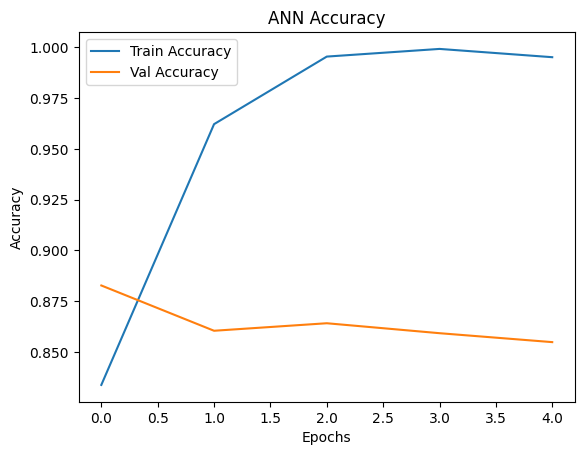

In [42]:
import matplotlib.pyplot as plt

plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Val Accuracy')
plt.title('ANN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [44]:
loss, accuracy = model_ann.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8481 - loss: 0.8277
Test Accuracy: 0.8548


### Inference

- ANN (Artificial Neural Network) Training Accuracy: ↑ Very High (~99.7%) and Validation Accuracy: ~85.5% (Peak: 88.2%)

- Model is likely overfitting — very high training accuracy but lower validation accuracy.

- Performance drops after epoch 2, suggesting need for regularization or early stopping.

## RNN

In [46]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [89]:
vocab_size = 10000     
embedding_dim = 64
max_len = 200          

model_rnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    SimpleRNN(64, return_sequences=False),  # you can tune 64 units
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



C:\Users\swapn\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [88]:
model_rnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (32, 200, 64)               │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (32, 64)                    │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 32)                    │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 1)                     │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,951,109 (7.44 MB)

 Trainable params: 650,369 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,300,740 (4.96 MB)

In [53]:
history_rnn = model_rnn.fit(
    x_train, y_train,
    epochs=9,
    batch_size=32,
    validation_data=(x_test, y_test)
)


Epoch 1/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.5807 - loss: 0.5939 - val_accuracy: 0.5198 - val_loss: 0.7493
Epoch 2/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - accuracy: 0.5724 - loss: 0.6024 - val_accuracy: 0.5298 - val_loss: 0.7573
Epoch 3/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - accuracy: 0.5765 - loss: 0.6055 - val_accuracy: 0.5272 - val_loss: 0.8142
Epoch 4/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.5760 - loss: 0.5962 - val_accuracy: 0.5309 - val_loss: 0.8123
Epoch 5/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - accuracy: 0.5788 - loss: 0.5889 - val_accuracy: 0.5265 - val_loss: 0.8661
Epoch 6/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.5828 - loss: 0.5900 - val_accuracy: 0.5293 - val_loss: 0.8372
Epoch 7/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 46ms/step - accuracy: 0.5825 - loss: 0.5859 - val_accuracy: 0.5367 - val_loss: 0.8449
Epoch 8/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 46ms/step - accuracy: 0.5849 - loss: 0

In [54]:
loss, accuracy = model_rnn.evaluate(x_test, y_test)
print(f"RNN Test Accuracy: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5277 - loss: 0.9259
RNN Test Accuracy: 0.5262


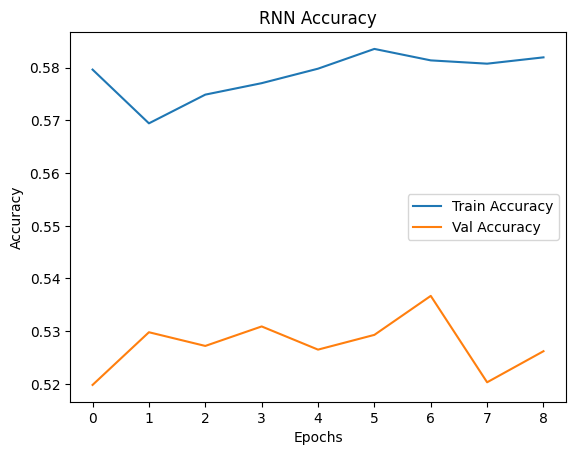

In [55]:
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Val Accuracy')
plt.title('RNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Inference
- RNN (Simple Recurrent Neural Network) Training Accuracy: ~58% andValidation Accuracy: ~52% (no improvement across epochs)

- Underperformed due to inability to capture long-term dependencies in review texts.

- Training is stable but accuracy remains poor

## LSTM (Long Short-Term Memory)

In [56]:
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [90]:
vocab_size = 10000
embedding_dim = 64
max_len = 200

model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=False),  # try return_sequences=True for stacking later
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [58]:
history_lstm = model_lstm.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test)
)


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 118s 92ms/step - accuracy: 0.5237 - loss: 0.6852 - val_accuracy: 0.5387 - val_loss: 0.6706
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.5875 - loss: 0.6207 - val_accuracy: 0.8621 - val_loss: 0.3190
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 857s 686ms/step - accuracy: 0.8977 - loss: 0.2610 - val_accuracy: 0.8724 - val_loss: 0.2960
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 91ms/step - accuracy: 0.9380 - loss: 0.1731 - val_accuracy: 0.8920 - val_loss: 0.2783
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 116s 93ms/step - accuracy: 0.9649 - loss: 0.1059 - val_accuracy: 0.8871 - val_loss: 0.3152


In [59]:
loss, accuracy = model_lstm.evaluate(x_test, y_test)
print(f"LSTM Test Accuracy: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.8829 - loss: 0.3196
LSTM Test Accuracy: 0.8871


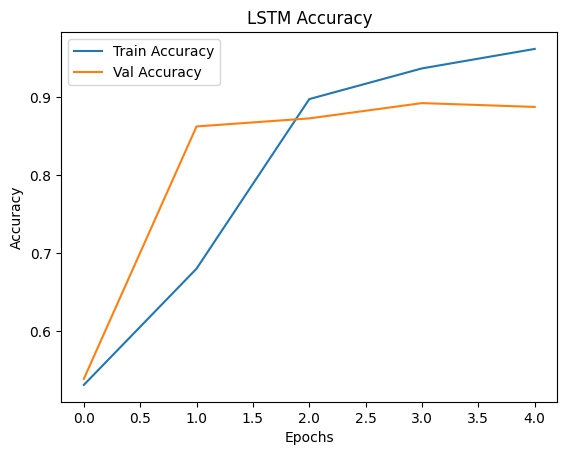

In [60]:
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Inference
- LSTM (Long Short-Term Memory Network) Training Accuracy: ↑ 96.4% and Validation Accuracy: ↑ 89.2%

- Best performing deep learning model.

- Handles sequential context better, avoids vanishing gradient problem.

- More computationally intensive, but provides excellent generalization.

## Machine Learning Model

In [64]:
# Initialize vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Apply TF-IDF to clean reviews
x_tfidf = tfidf.fit_transform(df['clean_review'])

# Target variable
y_tfidf = df['sentiment'].map({'positive': 1, 'negative': 0}).values


In [65]:

x_train_ml, x_test_ml, y_train_ml, y_test_ml = train_test_split(x_tfidf, y_tfidf, test_size=0.2, random_state=42)


### Logistic Regression

In [109]:
log_model = LogisticRegression()
log_model.fit(x_train_ml, y_train_ml)

y_pred_log = log_model.predict(x_test_ml)
print("Logistic Regression Accuracy:", accuracy_score(y_test_ml, y_pred_log))
print(classification_report(y_test_ml, y_pred_log))

print("Logistic Regression Test Accuracy:", accuracy_score(y_test_ml, y_pred_log_test))

Logistic Regression Accuracy: 0.8865
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [115]:
print("train score:",log_model.score(x_train_ml, y_train_ml))
print("test score:",log_model.score(x_test_ml, y_test_ml))

train score: 0.909325
test score: 0.8865


### Inference
- Logistic Regression Test Accuracy: 88.6% and Precision/Recall/F1-score: ~0.89

- Lightweight and fast.

- Performs surprisingly well on TF-IDF features.

### Support vector machine (SVM)

In [78]:
svm_model = LinearSVC()
svm_model.fit(x_train_ml, y_train_ml)

y_pred_svm = svm_model.predict(x_test_ml)
print("SVM Accuracy:", accuracy_score(y_test_ml, y_pred_svm))
print(classification_report(y_test_ml, y_pred_svm))


SVM Accuracy: 0.8799
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [116]:
print("train score:",svm_model.score(x_train_ml, y_train_ml))
print("test score:",svm_model.score(x_test_ml, y_test_ml))

train score: 0.92845
test score: 0.8799


### Inference
- Support Vector Machine (Linear SVM) Test Accuracy: 87.9% and F1-score: ~0.88

- Marginally below logistic regression

- Stable and consistent, good alternative for linear separable data.

### Random Forest

In [70]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_ml, y_train_ml)

y_pred_rf = rf_model.predict(x_test_ml)
print("Random Forest Accuracy:", accuracy_score(y_test_ml, y_pred_rf))
print(classification_report(y_test_ml, y_pred_rf))


Random Forest Accuracy: 0.8492
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [117]:
print("train score:",rf_model.score(x_train_ml, y_train_ml))
print("test score:",rf_model.score(x_test_ml, y_test_ml))

train score: 1.0
test score: 0.8492


### Inference
- Test Accuracy: 84.92% and F1-score: 0.85

- model is overfitting and overtrain

- Not good for analysis as  overfitting and Higher computational cost compared to Logistic Regression or Naive Bayes.


### Naive Bayes

In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [81]:
nb_model = MultinomialNB()
nb_model.fit(x_train_ml, y_train_ml)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [83]:
# Train and Test Predictions
y_pred_nb_train = nb_model.predict(x_train_ml)
y_pred_nb_test = nb_model.predict(x_test_ml)

# Accuracy Scores
print("Naive Bayes Train Accuracy:", accuracy_score(y_train_ml, y_pred_nb_train))
print("Naive Bayes Test Accuracy:", accuracy_score(y_test_ml, y_pred_nb_test))

# Classification Report
print("\nClassification Report (Naive Bayes):\n")
print(classification_report(y_test_ml, y_pred_nb_test))


Naive Bayes Train Accuracy: 0.8595
Naive Bayes Test Accuracy: 0.8504

Classification Report (Naive Bayes):

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [118]:
print("train score:",nb_model.score(x_train_ml, y_train_ml))
print("test score:",nb_model.score(x_test_ml, y_test_ml))

train score: 0.8595
test score: 0.8504


### Inference
- Naive Bayes (MultinomialNB) Train Accuracy: 85.9% and Test Accuracy: 85.0%

- Simple and fast.

- Performs reasonably well, but limited by naive independence assumption.

## Model Evaluation Summary:
- LSTM outperforms all models in validation accuracy and F1-score, making it the most suitable for this sentiment analysis task.

- Logistic Regression and SVM are strong traditional baselines, offering high performance with less computational cost.

- Naive Bayes is a good quick-start model, but slightly less accurate.

- RNN struggled due to its inability to capture long-term word dependencies replaced successfully by LSTM.

- ANN and random forest not sutable model for this as RNN performed well initially but overfitted and random forest completely overtrain(overfitted)

### Conclusion
- Deep learning models like LSTM capture the contextual and sequential nature of text better than classical models and can be best suited for sentiment analysis
  
- However, for lightweight deployment, Logistic Regression offers a great value between speed and accuracy.

# loom Video link
https://www.loom.com/share/5be8e7ad76b54779b73c37da4112378c?sid=2cf90d49-93b3-41f3-b32c-9a868f48547e

# drive video link
https://drive.google.com/file/d/1mkvWrenyv7vh8K7HkmlIxwPN2v8w7v6H/view?usp=sharing